# 911 Calls Data Analysis


911 call data downloaded from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 


# Setup

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv("911.csv")

In [46]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [47]:
df.drop(['e'], axis=1).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [48]:
#Checking for null values
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

# Basic Questions

#### What are the top 5 zipcodes for 911 calls?

In [49]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls?

In [50]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### How many unique title codes are there? 

In [51]:
df['title'].nunique()

110

# Creating Features

#### Adding "Type" attribute, to denote the type of 911 emergency. This attribute is extracted from the "title" column. 

In [52]:
df["Type"] = df["title"].apply(lambda x: x.split(":")[0])

In [53]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### What is the most common type of 911 emergency call?

In [54]:
df['Type'].value_counts().index[0]

'EMS'

#### Countplot of 911 calls by type

Text(0, 0.5, '911 calls')

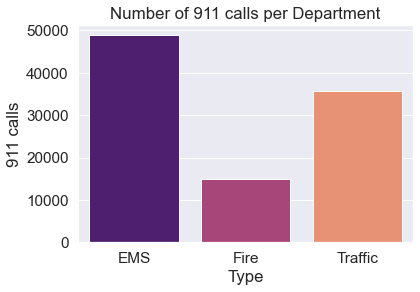

In [55]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df["Type"],palette="magma")
plt.title("Number of 911 calls per Department")
plt.ylabel("911 calls")

#### Creating new attributes: Hour, Month, Day of Week

In [56]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [57]:
df['Hour'] = df["timeStamp"].apply(lambda x: x.hour)
df['Month'] = df["timeStamp"].apply(lambda x: x.month)
df['Day of Week'] = df["timeStamp"].apply(lambda x: x.dayofweek)

#mapping 0-6 to Mon-Sun
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of Week"] = df["Day of Week"].map(dmap)

In [58]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


#### Displaying 911 calls based on the type of the emergency and day of the week.

Text(0, 0.5, '911 calls')

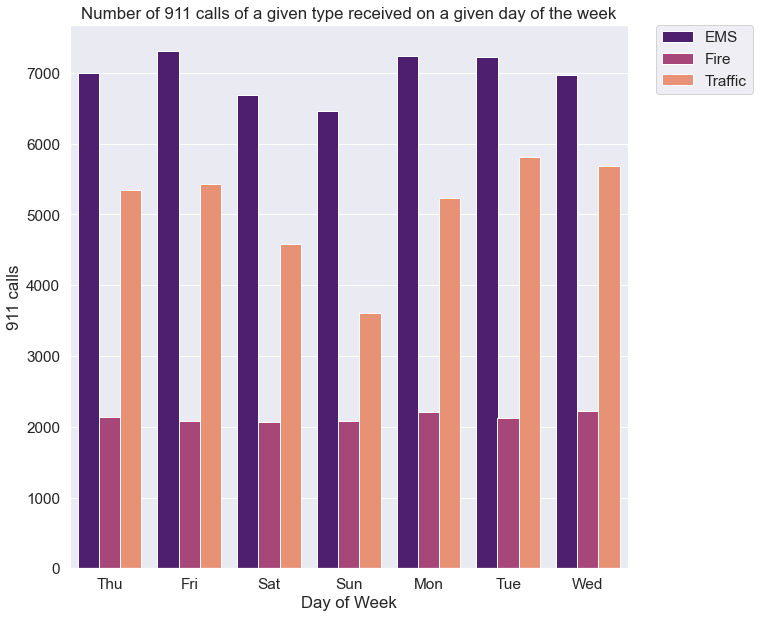

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["Day of Week"],hue=df['Type'],palette = 'magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Number of 911 calls of a given type received on a given day of the week")
plt.ylabel("911 calls")

Text(0.5, 1.0, 'Number of 911 calls on a given month')

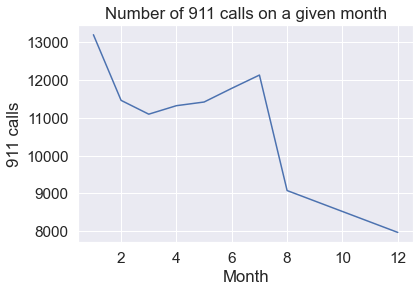

In [60]:
df.groupby("Month").count().index
sns.lineplot(x=df.groupby("Month").count().index,y=df.groupby("Month").count()["lat"])
plt.ylabel("911 calls")
plt.title("Number of 911 calls on a given month")

#### Linear model

In [61]:
byMonth = df.groupby("Month").count()

In [62]:
byMonth.reset_index(inplace=True)
byMonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Text(-14.450000000000003, 0.5, '911 Calls')

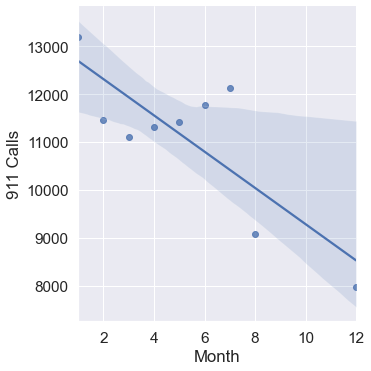

In [63]:
sns.lmplot(x="Month",y="lat",data = byMonth)
plt.ylabel("911 Calls")

#### New attribute: Date

In [64]:
df["Date"] = df["timeStamp"].apply(lambda x: x.date())

In [65]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [86]:
dnr = df.groupby(["Date","Type"]).count()
dnr

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Date       Type                                                             
2015-12-10 EMS       57   57    57   52     57         57   57    57   57   
           Fire      15   15    15   13     15         15   15    15   15   
           Traffic   43   43    43   35     43         43   43    41   43   
2015-12-11 EMS      186  186   186  166    186        186  186   186  186   
           Fire      69   69    69   59     69         69   68    68   69   
...                 ...  ...   ...  ...    ...        ...  ...   ...  ...   
2016-08-23 Fire      70   70    70   62     70         70   70    70   70   
           Traffic  151  151   151  128    151        151  151   149  151   
2016-08-24 EMS       71   71    71   59     71         71   71    71   71   
           Fire      19   19    19   17     19         19   19    19   19   
           Traffic   42   42    42   30     42         42   42    42   42   

                    Hour  Month  Day of Week  Reason  
Date       Type                                       
2015-12-10 EMS        57     57           57      57  
           Fire       15     15           15      15  
           Traffic    43     43           43      43  
2015-12-11 EMS       186    186          186     186  
           Fire       69     69           69      69  
...                  ...    ...          ...     ...  
2016-08-23 Fire       70     70           70      70  
           Traffic   151    151          151     151  
2016-08-24 EMS        71     71           71      71  
           Fire       19     19           19      19  
           Traffic    42     42           42      42  

[777 rows x 13 columns]

Text(0, 0.5, '911 calls')

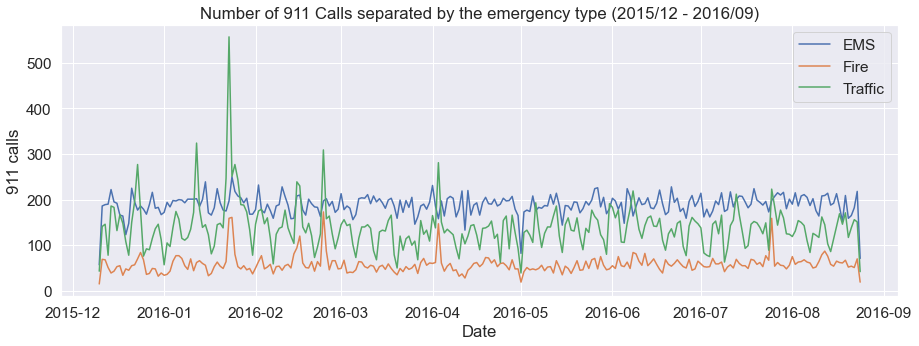

In [87]:
#dnr.index.levels[0]
plt.figure(figsize= (15,5))
for r in dnr.index.levels[1]:
    sns.lineplot(x=dnr.index.levels[0],y=dnr.xs(r, level="Type")['lat'])
plt.legend(labels=dnr.index.levels[1])
plt.title("Number of 911 Calls separated by the emergency type (2015/12 - 2016/09)")
plt.ylabel('911 calls')

# 911 Call frequency distribution

In [68]:
new_df = df.groupby(['Day of Week', 'Hour']).count().unstack(level=1)['lat']
new_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


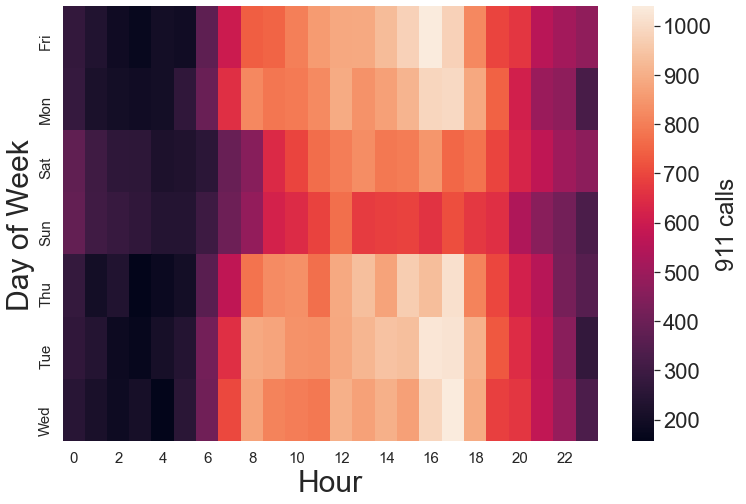

In [90]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
hm = sns.heatmap(new_df,cbar_kws={'label': '911 calls'})
hm.set_xlabel("Hour",fontsize=30)
hm.set_ylabel("Day of Week",fontsize=30)
hm.tick_params(labelsize=15)

#### From the cluster map below we can see that the greatest 911 call activity is 16:00-17:00 , Mon-Fri.

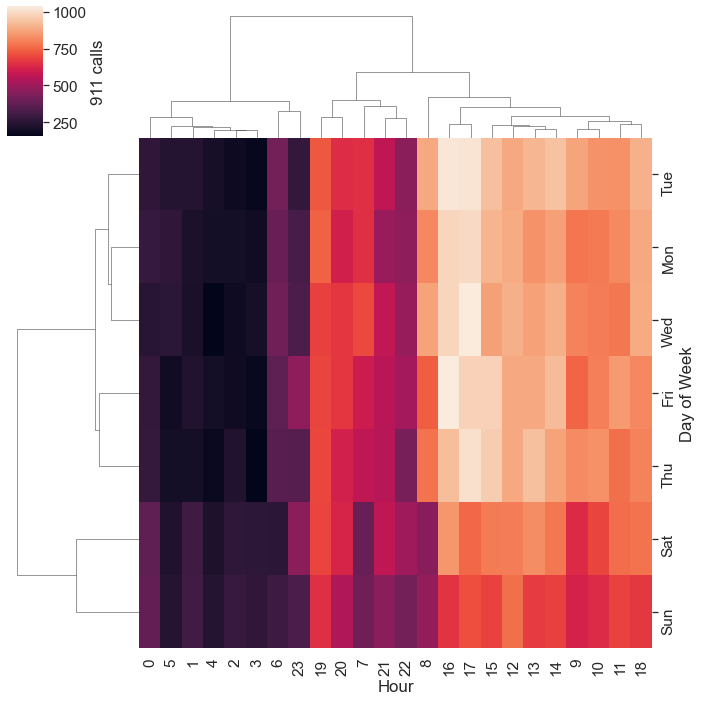

In [91]:
sns.set(font_scale=1.4)
hm = sns.clustermap(new_df,cbar_kws={'label': '911 calls'})


#### Saturday, January: Most active time for 911 calls

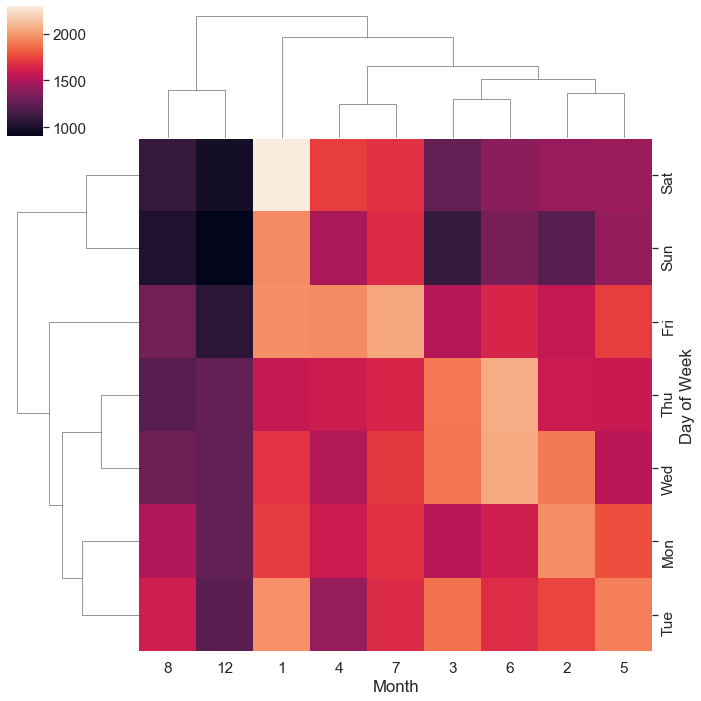

In [71]:
new_df2 = df.groupby(['Day of Week', 'Month']).count().unstack(level=1)['lat']
new_df2
sns.set(font_scale=1.4)
hm = sns.clustermap(new_df2)

# Reason for the call

#### Extracting the reason of a call from title colum and creating a new attribute: "Reason"

In [72]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[1])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Month,Day of Week,Date,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,DIZZINESS


#### Number of unique reasons:

In [73]:
df["Reason"].nunique()

81

In [74]:
#taking a look at all documented reasons of 911 calls
pd.set_option('display.max_rows', 81)
df.groupby("Reason").count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Month,Day of Week,Date
Reason,,,,,,,,,,,,,,
ABDOMINAL PAINS,1436,1436,1436,1354,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
ACTIVE SHOOTER,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ALLERGIC REACTION,438,438,438,410,438,438,438,438,438,438,438,438,438,438
ALTERED MENTAL STATUS,1386,1386,1386,1300,1386,1386,1385,1386,1386,1386,1386,1386,1386,1386
AMPUTATION,14,14,14,12,14,14,14,14,14,14,14,14,14,14
ANIMAL BITE,83,83,83,74,83,83,83,83,83,83,83,83,83,83
APPLIANCE FIRE,193,193,193,183,193,193,193,193,193,193,193,193,193,193
ASSAULT VICTIM,657,657,657,597,657,657,657,657,657,657,657,657,657,657
BACK PAINS/INJURY,739,739,739,687,739,739,739,739,739,739,739,739,739,739


#### Most common emergencies

In [75]:
df.groupby("Reason").count().sort_values(by='lat',ascending=False).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Month,Day of Week,Date
Reason,,,,,,,,,,,,,,
VEHICLE ACCIDENT -,23066,23066,23066,19536,23066,23066,23066,22910,23066,23066,23066,23066,23066,23066
DISABLED VEHICLE -,7702,7702,7702,5791,7702,7702,7701,7405,7702,7702,7702,7702,7702,7702
VEHICLE ACCIDENT,5573,5573,5573,3420,5573,5573,5562,5569,5573,5573,5573,5573,5573,5573
FIRE ALARM,5510,5510,5510,5148,5510,5510,5510,5510,5510,5510,5510,5510,5510,5510
RESPIRATORY EMERGENCY,5112,5112,5112,4810,5112,5112,5111,5112,5112,5112,5112,5112,5112,5112


In [76]:
df["Reason"]=df["Reason"].apply(lambda x: str(x))

## Allergic reactions

In [77]:
#data frame of calls related to allergies
allergy = df[df["Reason"].apply(lambda x: "ALLERGIC" in x)]

### The most allergy related 911 calls were received during the summer months

Text(0, 0.5, '911 Calls')

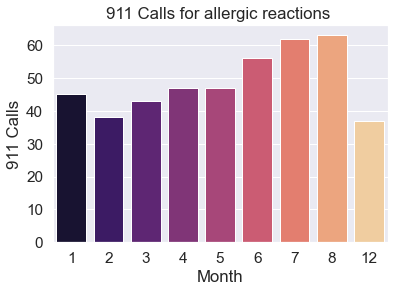

In [78]:
sns.countplot(x =allergy["Month"],palette="magma")
plt.title("911 Calls for allergic reactions ")
plt.ylabel("911 Calls")

## Vehicle accidents

In [79]:
vehicle_acc = df[df["Reason"].apply(lambda x: "VEHICLE ACCIDENT" in x)]

In [80]:
vehicle_acc.groupby("Month").count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Type,Hour,Day of Week,Date,Reason
Month,,,,,,,,,,,,,,
1,3537,3537,3537,2841,3537,3537,3537,3504,3537,3537,3537,3537,3537,3537
2,3162,3162,3162,2459,3162,3162,3162,3148,3162,3162,3162,3162,3162,3162
3,3010,3010,3010,2486,3010,3010,3010,2999,3010,3010,3010,3010,3010,3010
4,3209,3209,3209,2574,3209,3209,3207,3196,3209,3209,3209,3209,3209,3209
5,3544,3544,3544,2845,3544,3544,3544,3527,3544,3544,3544,3544,3544,3544
6,3515,3515,3515,2809,3515,3515,3513,3499,3515,3515,3515,3515,3515,3515
7,3372,3372,3372,2728,3372,3372,3371,3366,3372,3372,3372,3372,3372,3372
8,2600,2600,2600,2061,2600,2600,2599,2577,2600,2600,2600,2600,2600,2600
12,2690,2690,2690,2153,2690,2690,2685,2663,2690,2690,2690,2690,2690,2690


Text(0, 0.5, '911 Calls')

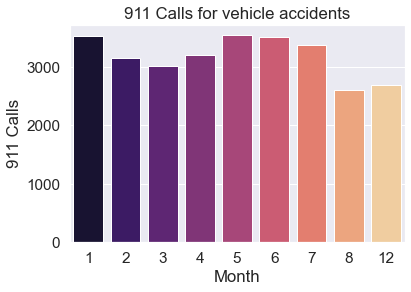

In [81]:
sns.countplot(x =vehicle_acc["Month"],palette="magma")
plt.title("911 Calls for vehicle accidents")
plt.ylabel("911 Calls")

### Vehicle accidents are reported most frequently on Mon-Fri, 15:00-17:00

In [82]:
dnh = vehicle_acc.groupby(["Day of Week","Hour"]).count()
dnh = dnh.unstack()['lat']

<Figure size 1080x720 with 0 Axes>

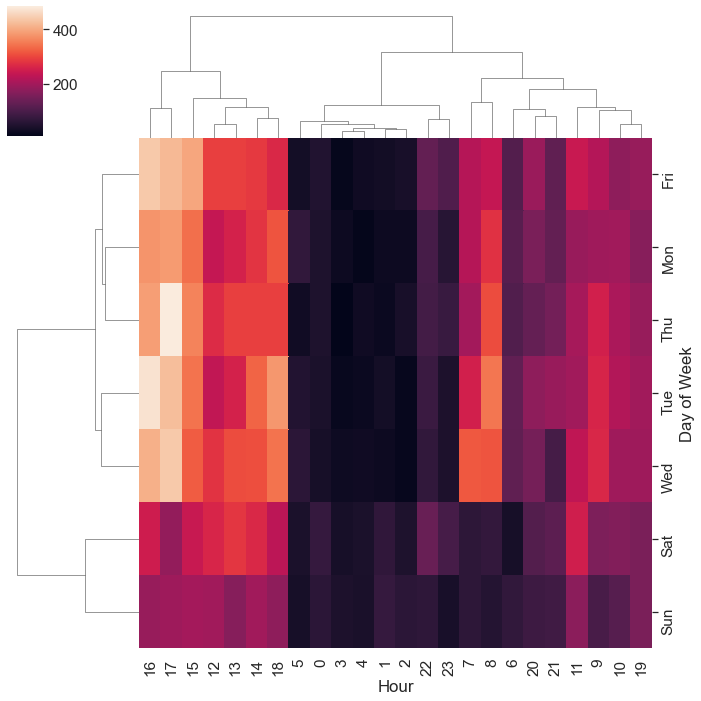

In [83]:
plt.figure(figsize=(15,10))
sns.clustermap(dnh)